# <center>对链家爬取到的租房数据进行探索性数据分析</center>


## 1.导入需要的库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 

# 加载绘图包
from pyecharts import *


## 2.加载爬取到的数据

In [2]:
# 这个是链家的数据，放在这儿。
df = pd.read_csv("guangdong.csv")
# 北京的
df1 = pd.read_csv("beijin.csv")
df2 = pd.read_csv("zhanjiang.csv")
df3 = pd.read_csv("chongqingAndzhejiang.csv")   # 四个加起来就可以有很多了。
df=pd.concat([df,df1,df2,df3],axis=0,ignore_index=True)

# 可以增加
# df4 = pd.read_csv("jiangsu.csv")  # 江苏就不熬了吧

# df=pd.concat([df,df1,df2,df3,df4],axis=0,ignore_index=True)

## 3.对爬取到的数据进行数据清洗

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23895 entries, 0 to 23894
Data columns (total 8 columns):
area           23895 non-null int64
direction      23888 non-null object
homeName       23888 non-null object
homeUrl        23895 non-null object
location       23895 non-null object
postDate       23895 non-null object
price          23895 non-null int64
roomContent    23888 non-null object
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [4]:
df.head(20)

,area,direction,homeName,homeUrl,location,postDate,price,roomContent
0,50,东/东南/南/西南/西,整租·晟园,https://dg.lianjia.com/zufang/DG22508526065135...,东莞松山湖松山湖,2019-05-06,2520,1室0厅
1,168,南,中联大厦,https://dg.lianjia.com/zufang/DG22355808542124...,东莞虎门镇虎门公园,2019-04-15,3600,3室2厅
2,111,南,整租·万科花园,https://dg.lianjia.com/zufang/DG21621216464952...,东莞虎门镇虎门公园,2019-04-15,3200,4室2厅
3,175,北,地标广场,https://dg.lianjia.com/zufang/DG21934607684799...,东莞虎门镇地标,2019-02-16,6000,3室2厅
4,228,东南,新世纪豪园一期,https://dg.lianjia.com/zufang/DG22355808753604...,东莞东城区火炼树,2019-04-15,5500,4室2厅
5,97,南,紫檀山,https://dg.lianjia.com/zufang/DG22355808760312...,东莞松山湖松山湖,2019-04-15,4000,3室2厅
6,155,东南,天利中央花园,https://dg.lianjia.com/zufang/DG22355808283255...,东莞南城区西平,2019-04-15,3500,4室2厅
7,268,东南,东骏豪苑,https://dg.lianjia.com/zufang/DG22355808734816...,东莞南城区西平,2019-04-15,10000,5室2厅
8,126,东南,整租·汇龙湾,https://dg.lianjia.com/zufang/DG22642429758889...,东莞南城区宏远北,2019-05-25,4800,4室2厅
9,110,东南,整租·稻花村,https://dg.lianjia.com/zufang/DG22355809072704...,东莞南城区东莞图书馆,2019-04-15,3100,3室2厅



+ 1.增加city列，填充所属城市
+ 2.房屋类型整理提取出来，方便观察。
+ 3.location 按需要增加经度纬度的两个列方便存放查询出来的地名的经纬度。

### 3.1增加city列

In [5]:
#所有城市的初始值，城市我没标出来，就只能后期来进行处理了。这个东西。
# 1. 增加city分类。
locationCode = ['dg', 'fs', 'gz', 'hui', 'jiangmen', 'qy', 'sz',
                     'zh', 'zhanjiang', 'zs','sh','hz','bj']  # 
# 写一个用来分类的函数
def classify(string):  # 输入一个这个column的dataframe
#     print(df.info())
#     print(df.head(5))
    if string.find("dg")!=-1:
        pass
        return "东莞"
    if string.find("fs")!=-1:
        pass
        return "佛山"
    if string.find("gz")!=-1:
        return "广州"
        pass
    if string.find("hui")!=-1:
        return "惠州"
        pass
    if string.find("jiangmen")!=-1:
        return "江门"
        pass
    if string.find("qy")!=-1:
        return "清远"
        pass
    if string.find("sz")!=-1:
        return "深圳"
        pass
    if string.find("zh")!=-1:
        return "珠海"
        pass
    if string.find("zhanjiang")!=-1:
        return "湛江"
        pass
    if string.find("zs")!=-1:
        return "中山"
    if string.find("bj")!=-1:
        return "北京"
    if string.find("cq")!=-1:
        return "重庆"
    if string.find("hz")!=-1:
        return "杭州"
    if string.find("sh")!=-1:
        return "上海"
        pass
    
    ## 原来如此，是因为如果增加值的话，还有一些没分类。

df_clean = df.copy()
df_clean['city'] = None  # 创建新列需要使用[''] 而不能直接使用 df.newColumn 来创建
df_clean['city'] =df_clean.homeUrl.apply(classify)
df_clean.info()

# 第四个图，每个城市在链家内的租房信息数量所占比例。
# 已增加city列。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23895 entries, 0 to 23894
Data columns (total 9 columns):
area           23895 non-null int64
direction      23888 non-null object
homeName       23888 non-null object
homeUrl        23895 non-null object
location       23895 non-null object
postDate       23895 non-null object
price          23895 non-null int64
roomContent    23888 non-null object
city           23895 non-null object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [6]:
df_clean.city.value_counts()  #检查city字段的显示情况。

珠海    3559
北京    2008
惠州    2007
上海    2001
中山    1992
杭州    1755
东莞    1747
佛山    1577
广州    1560
深圳    1559
重庆    1555
清远    1329
江门    1246
Name: city, dtype: int64

### 3.2 增加layout列、room列、hall 存储房屋布局类型，房间数还有客厅数

In [7]:
#分类房型的
def splitLayout(string):
    string = str(string)
    if string.find("-")!=-1:
        return string.split("-")[-1]  # 取用最后面那一节。
    else:
        return "普通"

def splitRoom(string):
#     print(string)
#     print(type(string))
    string = str(string)
    if string.find("室")!=-1:
        return string.split("室")[0]  # 取用最后面那一节。
    else:
        return "未统计？"
    
def splitHall(string):
    string = str(string)
    if string.find("厅")!=-1:
        return string.split("厅")[0].split("室")[-1]  # 取用最后面那一节。
    else:
        return "未统计？"

df_clean['room'] = None  # 创建新列需要使用[''] 而不能直接使用 df.newColumn 来创建
df_clean['hall'] = None  # 创建新列需要使用[''] 而不能直接使用 df.newColumn 来创建
df_clean['layout'] = None  # 创建新列需要使用[''] 而不能直接使用 df.newColumn 来创建
df_clean['room'] = df_clean.roomContent.apply(splitRoom )
df_clean['hall'] = df_clean.roomContent.apply(splitHall )
df_clean['layout']= df_clean.roomContent.apply(splitLayout)


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23895 entries, 0 to 23894
Data columns (total 12 columns):
area           23895 non-null int64
direction      23888 non-null object
homeName       23888 non-null object
homeUrl        23895 non-null object
location       23895 non-null object
postDate       23895 non-null object
price          23895 non-null int64
roomContent    23888 non-null object
city           23895 non-null object
room           23895 non-null object
hall           23895 non-null object
layout         23895 non-null object
dtypes: int64(2), object(10)
memory usage: 2.2+ MB


## 4 进行数据分析(数据可视化处理)

### 4.1 第一个图，查看链家租房中各种房型的比例

In [9]:
df_clean = df_clean[df_clean['layout'].str.find("室")==-1] # 去掉那些房型没有的类型的。
df_clean.layout.value_counts()  
df_clean_value_counted = df_clean.layout.value_counts()  


# 生成饼图的
# attr = list (df_clean_value_counted.column)
print(df_clean_value_counted.index)
print(df_clean_value_counted.values)

attr = list (df_clean_value_counted.index)
v1 = list(df_clean_value_counted.values)

# from pyecharts import Pie
# 10个表就可以了。
pie = Pie("租房中各种房型的所占比例")
pie.add("",attr,v1,is_label_show=True,)
# pie.set_global_opts(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
#   init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
pie.render("1.pieOfRoomLayout.html")
pie

Index(['普通', '跃层', '复式', 'LOFT', '错层'], dtype='object')
[23558   144   117    34    29]


### 4.2 查看爬取的数据中所在城市的情况

In [10]:
tempCityRank = df_clean['city'].value_counts() 
# 并且按照从大到小的顺序进行排列
tempCityRank= tempCityRank.sort_values(ascending=False)
tempCityRank

# from pyecharts import Bar 
bar = Bar('爬取的数据中各城市的租房信息数量')
kwargs = dict(
    name = '租房信息数量',
#     x_axis = ['衬衫','羊毛衫','雪纺衫','裤子','高跟鞋','袜子'],
    x_axis= list(tempCityRank.index),
    y_axis = list(tempCityRank.values),
    xaxis_name= "城市名",yaxis_name= "租房信息频数",
    xaxis_name_gap= 25,
    yaxis_name_gap= 50,
    is_label_show= True,
)
bar.add(**kwargs)
print("总共有{}".format(len(df_clean)))  # 总共2w3k条数据的情况下。
bar.render('2.barCityRank.html')# 这个是生成单个的，如果需要一次性合成多个的那种就不一样的操作了。
bar



总共有23882


### 4.3 链家中住房的朝向情况分析

In [11]:
# 1.绘制柱状图比较前10个的。
directionRoom = df.direction.value_counts()
directionRoom=directionRoom.sort_values(ascending=False) #逆序，然后只取用前10个逆序后的样本

directionRoom = df.direction.value_counts()
directionRoom=directionRoom.sort_values(ascending=False) #逆序，然后只取用前10个逆序后的样本

tempDir = directionRoom.head(10)
print(list(tempDir.index))
print(list(tempDir.values))

from pyecharts import Bar 
bar = Bar('房屋朝向最多的前10个朝向')
kwargs = dict(
    name = '数量柱形图',
#     x_axis = ['衬衫','羊毛衫','雪纺衫','裤子','高跟鞋','袜子'],
    x_axis= list(tempDir.index),
    y_axis = list(tempDir.values),
    xaxis_name= "租房房间朝向",yaxis_name= "频数",
        xaxis_name_gap= 25,
    yaxis_name_gap= 50,
)
bar.add(**kwargs)
bar.render('3.barDirection.html')# 这个是生成单个的，如果需要一次性合成多个的那种就不一样的操作了。
bar

['南', '东南', '南/北', '北', '东', '南卧', '西南', '西', '西北', '北卧']
[10226, 3414, 2783, 1559, 1180, 972, 818, 470, 421, 387]


### 4.4 查看租房价格和租房面积的散点图（100平方米以下的情况）

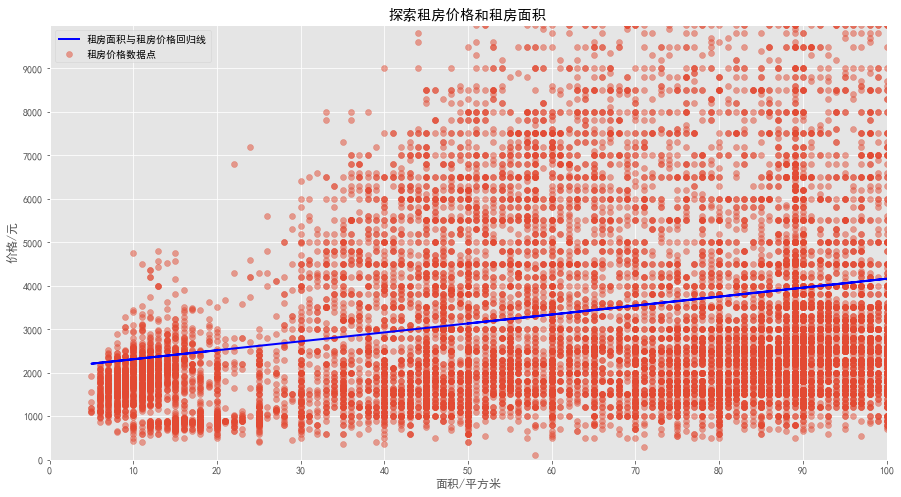

In [49]:
# 使用昨天你懂那个来做一个回归的东西。

# 设置中文
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.style.use( 'ggplot')


v1 = [10, 20, 30, 40, 50, 60]
v2 = [10, 20, 30, 40, 50, 60]


# 考虑到我如果出去工作，租房也不会那么大，于是我这个我只研究100平方米内的价格变化
tempPrice = df_clean[df_clean['area']<=100]

# v2 = list(tempPrice.price)
# v1 = list(tempPrice.area)



from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit( tempPrice.area.values.reshape(- 1, 1),tempPrice.price.values.reshape(- 1, 1))
# 回归预测值
pred = reg.predict(tempPrice.area.values.reshape(- 1, 1))
plt.plot(tempPrice.area, pred, linewidth = 2, label = '租房面积与租房价格回归线',color="blue")
plt.ylim(0,10000,1000)
plt.yticks(np.arange(0,10000,1000))
plt.xlim(0,100,10)
plt.xticks(np.arange(0,110,10))

plt.title("探索租房价格和租房面积")
plt.xlabel("面积/平方米")
plt.ylabel("价格/元")

plt.scatter(tempPrice.area,tempPrice.price,alpha=0.5,label="租房价格数据点")
# 回归预测值
plt.legend()
plt.show()



In [12]:
# from pyecharts import Scatter
v1 = [10, 20, 30, 40, 50, 60]
v2 = [10, 20, 30, 40, 50, 60]

# 考虑到我如果出去工作，租房也不会那么大，于是我这个我只研究100平方米内的价格变化
tempPrice = df_clean[df_clean['area']<=100]

v2 = list(tempPrice.price)
v1 = list(tempPrice.area)

scatter = Scatter("价格和面积的关系")
scatter.add("价格和面积的关系", v1, v2,xaxis_name= "面积/㎡",yaxis_name= "价格/元" ,    yaxis_name_gap= 50 ,symbol_size=3) # ,is_datazoom_show=True
# )
# scatter.add(   xaxis_name_gap= 25,
# scatter.add("B", v1[::-1], v2)
scatter.render('4.scatterOfPriceAndArea.html')# 这个是生成单个的，如果需要一次性合成多个的那种就不一样的操作了。
scatter

#  可以看到随着面积的增加，价格上限也在增加的。

### 4.5 各城市租房价格的 均值 和 中位数 的变化比较
因为前面我们查看所有的地方的价格

In [13]:
# 这儿开始，使用到的是数据的聚合

grouped = df_clean['price'].groupby(df_clean['city'])
cityMean = grouped.mean()
cityMedian = grouped.median()

# from pyecharts import Line,configure
# configure(output_image=True)
# attr = ['惠州','东莞','广州','深圳','佛山','江门','珠海']
attr = cityMean.index
# v1 = [23,45,68,58,32,28,36]
# v2 = [12,22,34,29,16,14,18]


# 让结果保留两位小数进行输出。
cityMean = cityMean.round(decimals=2)
cityMedian = cityMedian.round(decimals=2)  # 保留两位小数


v1 = cityMean.values
v2 = cityMedian.values

# line.add(
#     name="各城市租房价格情况" #, is_splitline_show= False,xaxis_name= "城市名",yaxis_name= "租房的价格"
# )
line =Line('各城市租房的均值',background_color = 'white',title_text_size = 25)

line.add('各城市租房的均值',attr,v1,mark_line=['average'],is_label_show = True,is_smooth=True)
line.add("各城市租房的中位数",attr,v2,mark_line=['median'],is_label_show = True,is_smooth=True,xaxis_name= "城市名",yaxis_name= "价格/元",yaxis_name_gap= 50 ,symbol_size=3)

line.render("5.各城市租房均值和中位数的变化比较.html")
line

# 可以看到所爬取到的城市中，伤害，北京，深圳的租房价格的 平均值 和中位数都 很高， 惠州，清远 和江门的都比较低，出乎意外的是 重庆也很低/


### 4.6 租房价格的 中位数 漏斗图

In [14]:
import pyecharts
fl = pyecharts.Funnel("租房价格均值漏斗图",  title_pos='left', width=1200, height=600)
fl.add("各城市租房价格均值",cityMedian.index , cityMedian.values, is_label_show=True, label_pos='inside', label_text_color='white')

fl.render("6.最高租房价格均值漏斗图.html")
fl

# cityMean.values

### 4.7 查看深圳和广州中租房价格2000元及以下的租房占比 的 仪表图

In [15]:
# 这儿只限定查看广州和深圳这两个地方的数据。
df_gz_sz = df_clean[(df_clean['city']=="广州")| (df_clean['city']=='深圳') ]  #| (df_clean['city']=='深圳')
print(df_gz_sz.city.value_counts())

num = 2000

canRentNum = len(df_gz_sz[df_gz_sz.price<num])
totalGzSzNum = len(df_gz_sz)
print(canRentNum)
print(totalGzSzNum
     )
print(canRentNum/totalGzSzNum)


print("{:.2}".format(canRentNum/totalGzSzNum))
# 2000 元每个月以内的租房的信息达标图
gu = pyecharts.Gauge("深圳和广州中租房价格{}元以下".format(num))
gu.add("{}元以下".format(num), "占比", float("{:.2}".format(canRentNum/totalGzSzNum*100)))

gu.render("7.租房2000元以下占比仪表图.html")
gu


# 可以看到2000元的租房价格占比并不太多，总体来说，不太容易。

广州    1560
深圳    1559
Name: city, dtype: int64
578
3119
0.18531580634818853
0.19


### 4.8 查看广州和2000元以下的租房中类型是合租和非合租的比例

In [16]:
# 这儿使用来做 看看广州哪儿租房最便宜， 广州哪一片区的租房价格比较便宜。  这个价格是可以接受的，然后我们来分析着看一看

# 这个是设置研究价格多少的

numPrice = 2000

checkMinArea_gz = df_clean[(df_clean['price']<numPrice) & (df_clean['city']=="广州")]  
print(len(checkMinArea_gz))
checkMinArea_gz.location.value_counts()  # 96条的长度，总共有多少个我就不知道了，看看才知道
checkMinArea_gz[['location','homeName']]
corRank = len(checkMinArea_gz[checkMinArea_gz.homeName.str.find("合租")!= -1 ])
Rank =  len(checkMinArea_gz[checkMinArea_gz.homeName.str.find("合租")== -1 ]) # 不是合租的这种
rate = Rank/corRank
rateNoCor =Rank/len(checkMinArea_gz)
rateCor =corRank/len(checkMinArea_gz)
print("价格小于{}的租房里面是合租的有{}个，不是合租的有{}，其中不合租是合租的{:.2}倍，\n然后广州2000的租房里面总共的比例是{:.2}是非合租的，{:.2}是合租的".format(numPrice,corRank,Rank,rate,rateNoCor,rateCor))
# 绘制饼图呗,看比例不用饼图那就是用堆叠柱状图了。好像没别的额。

# 又可以做折线图了，对比的数据是不同区间的前，从1000开始，每次增加500，然后以一直到5000的房租，看看合租和非合租的比例变化情况。

attr = ["合租","非合租"]
v1 = [rateCor,rateNoCor]

pie = Pie("广州{}元以下的合租房的比".format(numPrice))
# pie = Pie("租房中各种房型的所占比例")
pie.add("",attr,v1,is_label_show=True,)
pie.render("8.rateCor.html")
pie

# 所以2000元以下的价格，数量比较少，而且还是合租的比较多。

377
价格小于2000的租房里面是合租的有280个，不是合租的有97，其中不合租是合租的0.35倍，
然后广州2000的租房里面总共的比例是0.26是非合租的，0.74是合租的


In [17]:
# 按年来进行划分。
df_clean['postDate'] = pd.to_datetime( df_clean['postDate'] )  ## 转换日期格式
df_clean_date = df_clean.copy()
df_clean_date = df_clean_date.set_index('postDate') #将date设置为index

### 4.9 抓取到的所有数据按年份查看租房价格 均值 变化

In [18]:
line =Line('按年份来查看租房价格均值的变化',background_color = 'white',title_text_size = 25)
tempQprice =df_clean_date.resample('A').mean().to_period('A')

# tempQprice
tempQprice = tempQprice.round(decimals=2)
# cityMedian = cityMedian.round(decimals=2)  # 保留两位小数

newIndex = []
for i in list(tempQprice.index):
    newIndex.append(str(i))

attr = newIndex
v1= list(tempQprice['price'].values)
# print(tempQprice)

line.add('各城市租房的均值',attr,v1,mark_line=['average'],is_label_show = True,is_smooth=True,xaxis_name= "年份",yaxis_name= "租房价格/元",yaxis_name_gap= 50 ,symbol_size=3)
line.render("9.按年份来查看租房价格均值的变化.html")
line

### 4.10 抓取到的数据按季度查看租房价格 均值 变化

In [19]:
line =Line('按季度来查看租房价格均值的变化',background_color = 'white',title_text_size = 25)
tempQprice =df_clean_date.resample('Q').mean().to_period('Q')

# tempQprice
tempQprice = tempQprice.round(decimals=2)
# cityMedian = cityMedian.round(decimals=2)  # 保留两位小数

newIndex = []
for i in list(tempQprice.index):
    newIndex.append(str(i))

attr = newIndex
v1= list(tempQprice['price'].values)
# print(tempQprice)

line.add('各城市租房的均值',attr,v1,mark_line=['average'],is_label_show = True,is_smooth=True,xaxis_name= "季度",yaxis_name= "价格/元",yaxis_name_gap= 50 ,symbol_size=3)
line.render("10.按季度来查看价格均值的变化.html")
line

### 4.11  按 月份查看租房均值 的变化情况

In [20]:
line =Line('按月份来查看租房价格均值的变化',background_color = 'white',title_text_size = 25)
tempMprice =df_clean_date.resample('M').mean().to_period('M')

# tempQprice
tempMprice = tempMprice.round(decimals=2)
# cityMedian = cityMedian.round(decimals=2)  # 保留两位小数

newIndex = []
for i in list(tempMprice.index):
    newIndex.append(str(i))

attr = newIndex
v1= list(tempMprice['price'].values)
# print(tempQprice)

line.add('各城市租房的均值',attr,v1,mark_line=['average'],is_label_show = True,is_smooth=True,xaxis_name= "月份",yaxis_name= "价格/元",yaxis_name_gap= 50 ,symbol_size=3)
line.render("11.按月份来查看价格均值的变化.html")
line

### 4.12 广州范围内的租房价格 均值 按年份查看变化情况

In [21]:
line =Line('按年份来查看租房价格均值的变化',background_color = 'white',title_text_size = 25)
df_clean_date_gz = df_clean_date[df_clean_date['city']=="广州"]

tempGZprice =df_clean_date_gz.resample('A').mean().to_period('A')

# tempQprice
tempGZprice = tempGZprice.round(decimals=2)
# cityMedian = cityMedian.round(decimals=2)  # 保留两位小数

newIndex = []
for i in list(tempGZprice.index):
    newIndex.append(str(i))

attr = newIndex
v1= list(tempGZprice['price'].values)
# print(tempQprice)

line.add('各城市租房的均值',attr,v1,mark_line=['average'],is_label_show = True,is_smooth=True,xaxis_name= "年份",yaxis_name= "价格/元",yaxis_name_gap= 50 ,symbol_size=3)
line.render("12.广州的租房信息按年份来查看租房价格均值的变化.html")
line

### 4.13 广州的租房价格按季度查看价格

In [22]:
line =Line('广州的租房价格按季度来查看租房价格均值的变化',background_color = 'white',title_text_size = 25)
tempQgzprice =df_clean_date_gz.resample('Q').mean().to_period('Q')

# tempQprice
tempQgzprice = tempQgzprice.round(decimals=2)
# cityMedian = cityMedian.round(decimals=2)  # 保留两位小数

newIndex = []
for i in list(tempQgzprice.index):
    newIndex.append(str(i))

attr = newIndex
v1= list(tempQgzprice['price'].values)
# print(tempQprice)

line.add('各城市租房的均值',attr,v1,mark_line=['average'],is_label_show = True,is_smooth=True,xaxis_name= "季度(广州)",yaxis_name= "价格/元",yaxis_name_gap= 50 ,symbol_size=3)
line.render("13.广州按季度来查看价格均值的变化.html")
line

### 4.14 广州的租房价格按月份查看价格变化

In [23]:
line =Line('广州按月份来查看租房价格均值的变化',background_color = 'white',title_text_size = 25)
tempGZMprice =df_clean_date_gz.resample('M').mean().to_period('M')

# tempQprice
tempGZMprice = tempGZMprice.round(decimals=2)
# cityMedian = cityMedian.round(decimals=2)  # 保留两位小数

newIndex = []
for i in list(tempGZMprice.index):
    newIndex.append(str(i))

attr = newIndex
v1= list(tempGZMprice['price'].values)
# print(tempQprice)

line.add('广州租房的均值变化',attr,v1,mark_line=['average'],is_label_show = True,is_smooth=True,xaxis_name= "月份(广州)",yaxis_name= "价格/元",yaxis_name_gap= 50 ,symbol_size=3)
line.render("14.广州按月份来查看租房价格均值的变化.html")
line

### 4.15 广州的租房价格按周查看价格变化

In [24]:
## 
line =Line('广州按周来查看租房价格均值的变化',background_color = 'white',title_text_size = 25)
tempGZWMprice =df_clean_date_gz.resample('W').mean().to_period('W')

# tempQprice
tempGZWMprice = tempGZWMprice.round(decimals=2)
# cityMedian = cityMedian.round(decimals=2)  # 保留两位小数

newIndex = []
for i in list(tempGZWMprice.index):
    newIndex.append(str(i))

attr = newIndex
v1= list(tempGZWMprice['price'].values)
# print(tempQprice)

line.add('广州租房的均值变化',attr,v1,mark_line=['average'],is_label_show = True,is_smooth=True,xaxis_name= "按周划分(广州)",yaxis_name= "价格/元",yaxis_name_gap= 50 ,symbol_size=3)
line.render("15.广州按周来查看租房价格均值的变化.html")
# line.render（path="15.广州按周来查看租房价格均值的变化.png"）
# from pyecharts.render import make_snapshot

# from snapshot_selenium import snapshot
# make_snapshot(snapshot, line.render(), "15.广州按周来查看租房价格均值的变化.png")

line

参考：  
用pandas来进行时间序列的操作。https://www.jianshu.com/p/b91e3ae940ec  
pyecharts 的基本操作 https://blog.csdn.net/qq_31967985/article/details/79975663

# 总结，下一步还可以做的是建模，尤其是时间序列的预测之类的东西。

In [25]:
df_clean.to_csv("total.csv",index=0)

In [26]:
df_test  =pd.read_csv("total.csv")
df_test.info()
df_test.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23882 entries, 0 to 23881
Data columns (total 12 columns):
area           23882 non-null int64
direction      23875 non-null object
homeName       23875 non-null object
homeUrl        23882 non-null object
location       23882 non-null object
postDate       23882 non-null object
price          23882 non-null int64
roomContent    23875 non-null object
city           23882 non-null object
room           23882 non-null object
hall           23882 non-null object
layout         23882 non-null object
dtypes: int64(2), object(10)
memory usage: 2.2+ MB


,area,direction,homeName,homeUrl,location,postDate,price,roomContent,city,room,hall,layout
0,50,东/东南/南/西南/西,整租·晟园,https://dg.lianjia.com/zufang/DG22508526065135...,东莞松山湖松山湖,2019-05-06,2520,1室0厅,东莞,1,0,普通
1,168,南,中联大厦,https://dg.lianjia.com/zufang/DG22355808542124...,东莞虎门镇虎门公园,2019-04-15,3600,3室2厅,东莞,3,2,普通
2,111,南,整租·万科花园,https://dg.lianjia.com/zufang/DG21621216464952...,东莞虎门镇虎门公园,2019-04-15,3200,4室2厅,东莞,4,2,普通
3,175,北,地标广场,https://dg.lianjia.com/zufang/DG21934607684799...,东莞虎门镇地标,2019-02-16,6000,3室2厅,东莞,3,2,普通
4,228,东南,新世纪豪园一期,https://dg.lianjia.com/zufang/DG22355808753604...,东莞东城区火炼树,2019-04-15,5500,4室2厅,东莞,4,2,普通
5,97,南,紫檀山,https://dg.lianjia.com/zufang/DG22355808760312...,东莞松山湖松山湖,2019-04-15,4000,3室2厅,东莞,3,2,普通
6,155,东南,天利中央花园,https://dg.lianjia.com/zufang/DG22355808283255...,东莞南城区西平,2019-04-15,3500,4室2厅,东莞,4,2,普通
7,268,东南,东骏豪苑,https://dg.lianjia.com/zufang/DG22355808734816...,东莞南城区西平,2019-04-15,10000,5室2厅,东莞,5,2,普通
